# Capstone Project

# Topic - Telecom's Churn Reduction

# Professor - Sergei Schreider

# By - Tarang Haria

# RU ID - 190004326

What is 'Churn Rate' ?

The churn rate is the percentage of subscribers to a service who discontinue their subscriptions to the service within a given time period. For a company to expand its clientele, its growth rate, as measured by the number of new customers, must exceed its churn rate. This rate is generally expressed as a percentage.

Why is churn so important?

Customer churn (also known as customer attrition, customer turnover or customer defection) is a term used especially in the world of subscription based businesses to describe loss of customers. For example, if 10 out of 100 subscribers to an Internet service provider (ISP) cancelled their subscriptions, the churn rate for that ISP would be 10%.

Churn is important because it directly affects your service’s profitability. It is common to assume that the profitability of a service is directly related to the growth of its customer base. That might lead business owners to imply that in order to grow their customer base, the rate of acquiring new customers must exceed the churn rate.

# Loading Libraries
 

In [1]:
import os
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from sklearn import preprocessing

# Set working directory

In [368]:
os.chdir("C:/Users/Tarang/Desktop/RUTGERS/Capstone")
os.getcwd()

'C:\\Users\\Tarang\\Desktop\\RUTGERS\\Capstone'

# Loading Data


In [2]:
traindata = pd.read_csv("C:/Users/Tarang/Desktop/RUTGERS/Capstone/Train_data.csv")
testdata = pd.read_csv("C:/Users/Tarang/Desktop/RUTGERS/Capstone/Test_data.csv")

In [4]:
testdata

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.
5,IA,117,415,375-6180,no,no,0,226.5,85,38.51,...,68,12.04,223.0,90,10.04,6.9,5,1.86,1,False.
6,ND,63,415,348-8073,no,yes,32,218.9,124,37.21,...,125,18.22,260.3,120,11.71,12.9,3,3.48,1,False.
7,LA,94,408,359-9881,no,no,0,157.5,97,26.78,...,112,19.08,310.8,106,13.99,11.1,6,3.00,0,False.
8,MO,138,510,353-6954,no,no,0,89.1,117,15.15,...,46,10.78,190.5,71,8.57,9.9,4,2.67,2,False.
9,TX,128,415,403-4933,no,yes,43,177.8,100,30.23,...,89,12.52,194.2,92,8.74,11.9,1,3.21,0,False.


# Viewing the Train Data


In [370]:
traindata.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Viewing the Test Data

In [371]:
testdata.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


# Exploratory Data Analysis On Train Data

# Churn Ratio


 False.    2850
 True.      483
Name: Churn, dtype: int64


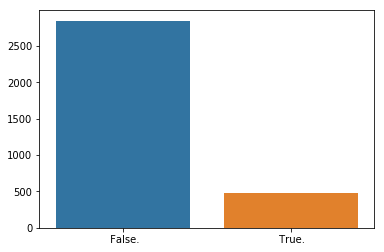

In [372]:
yy = traindata["Churn"].value_counts()
print (yy)
sns.barplot(yy.index, yy.values)

# Churn by State

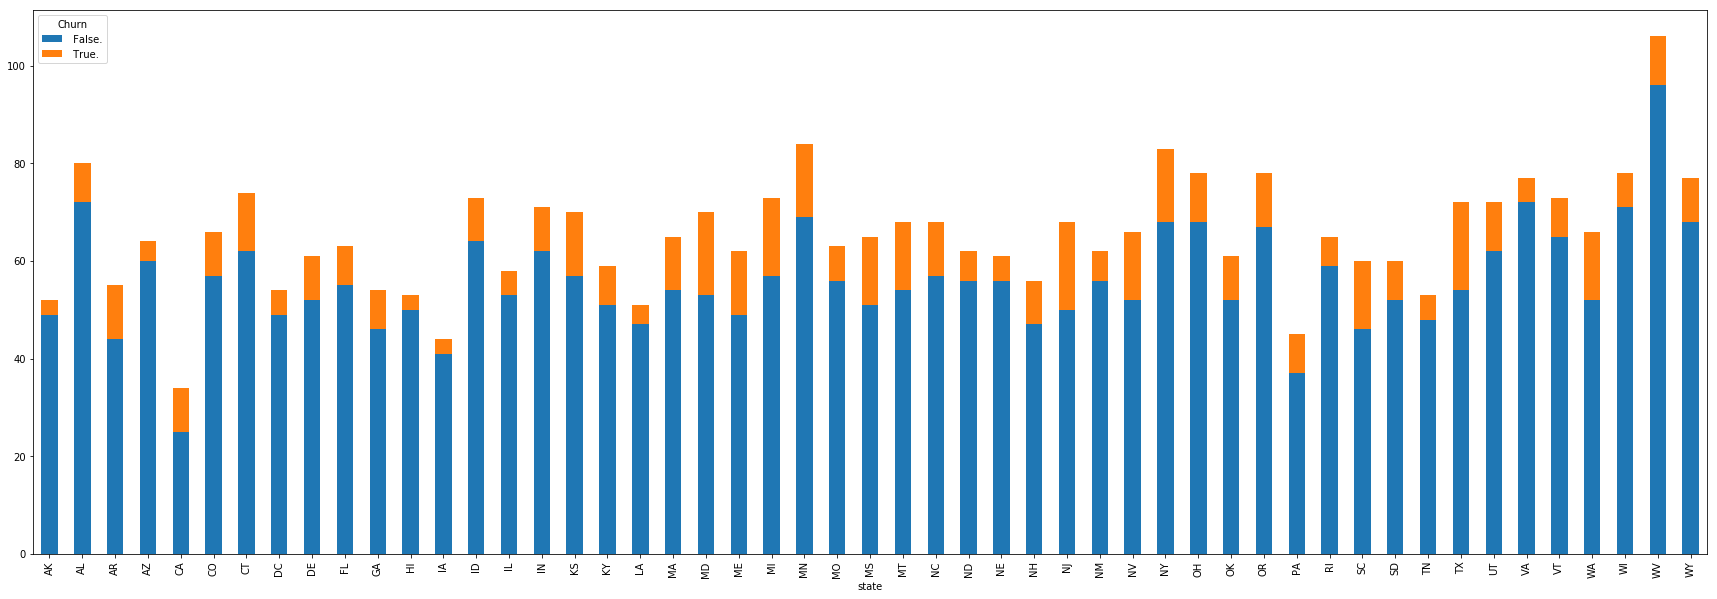

In [373]:
traindata.groupby(["state", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

# Churn by Area Code

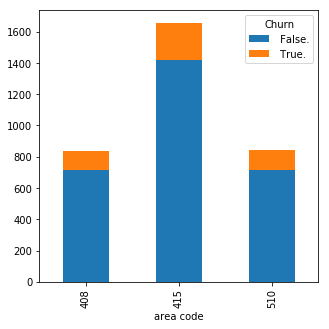

In [374]:
traindata.groupby(["area code", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

# Churn By Customers with International plan

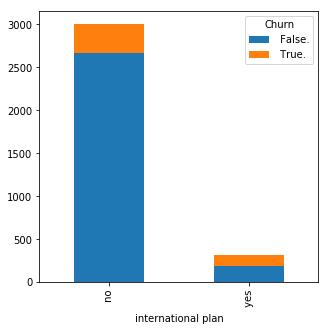

In [375]:
traindata.groupby(["international plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

# Churn By Customers with Voice Mail Plan

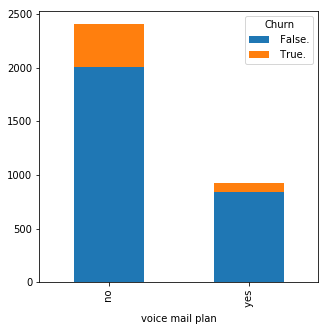

In [376]:
traindata.groupby(["voice mail plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

# After viewing the data, we see that we don't require the variables such as State, Phone Number and Area Code.
# Hence we will drop them.


In [377]:
traindata =traindata.drop(columns =['phone number','area code','state'])
testdata=testdata.drop(columns = ['phone number','area code','state'])

# New Train Data

In [378]:
traindata.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# New Test Data

In [379]:
testdata.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,101,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,137,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,103,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,99,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,108,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


# Pre-processing for Train Data

# Missing Value Analysis


In [380]:
missing_train = pd.DataFrame(traindata.isnull().sum())
missing_train

,0
account length,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0
total eve minutes,0
total eve calls,0
total eve charge,0


In [381]:
missing_test = pd.DataFrame(testdata.isnull().sum())
missing_test

,0
account length,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0
total eve minutes,0
total eve calls,0
total eve charge,0


# After analysing missing values for our train and test data, we found that there are no missing values.

# Outlier analysis


{'whiskers': [<matplotlib.lines.Line2D at 0x1e2b9054208>,
 'caps': [<matplotlib.lines.Line2D at 0x1e2b9054ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e2b90540b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e2b905d358>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e2b905d780>],
 'means': []}

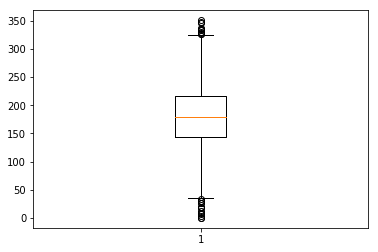

In [382]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.boxplot(traindata["total day minutes"])

# Storing all numeric variable

In [383]:
cnames =  ["account length","number vmail messages","total day minutes","total day calls","total day charge","total eve minutes","total eve calls","total eve charge","total night minutes","total night calls","total night charge","total intl minutes","total intl calls","total intl charge","number customer service calls"]
cnames

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls']

# Detect and delete outliers from train data


In [384]:
for i in cnames:
    print(i)
    q75, q25 = np.percentile(traindata.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
   
    traindata = traindata.drop(traindata[traindata.loc[:,i] < min].index)
    traindata = traindata.drop(traindata[traindata.loc[:,i] > max].index)


account length
-5.5
206.5
number vmail messages
-30.0
50.0
total day minutes
34.83749999999992
325.1375000000001
total day calls
46.5
154.5
total day charge
6.125
55.125
total eve minutes
64.42499999999995
337.82500000000005
total eve calls
46.5
154.5
total eve charge
5.5550000000000015
28.634999999999998
total night minutes
64.3
337.90000000000003
total night calls
48.0
152.0
total night charge
2.9449999999999985
15.145000000000001
total intl minutes
3.1000000000000005
17.5
total intl calls
-1.5
10.5
total intl charge
0.8949999999999996
4.695
number customer service calls
-0.5
3.5


# Checking data after boxplot. Here we have deleted all the outliers.

(2797, 18)

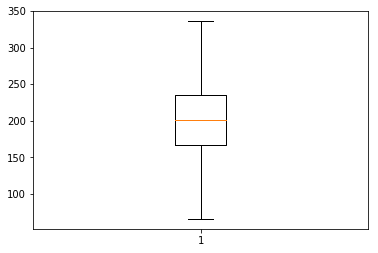

In [385]:
plt.boxplot(traindata["total eve minutes"])
traindata.shape

# Feature selection.
Before performing any type of modeling we need to assess the importance of each predictor variable in our analysis. There is a possibility that many variables in our analysis are not important at all to the problem of class prediction. There are several methods of doing that. Below we have used correlation, chi-sqr test and normalization.


# Correlation Analysis


In [386]:
#Correlation plot
corr = traindata.loc[:,cnames]

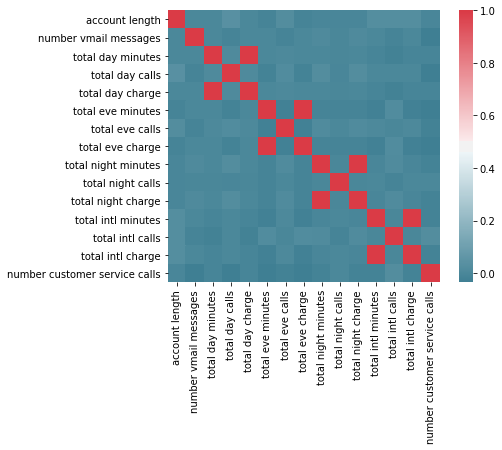

In [387]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Generate correlation matrix
corr = corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [388]:
#We remove highly coorelated variables we found from correlation test 
#a.total day minutes 
#b.total night minutes 
#c.total eve minutes 
#d.total intl minutes
traindata = traindata.drop(['total day minutes','total eve minutes','total intl minutes','total night minutes'],axis=1)

In [389]:
traindata.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
0,128,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False.
1,107,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False.
2,137,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False.
4,75,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False.
5,118,yes,no,0,98,37.98,101,18.75,118,9.18,6,1.70,0,False.


# Chisquare test of independence


In [390]:
#Save categorical variables
categories = ["international plan","voice mail plan"]
#loop for chi square values
for i in categories:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(traindata['Churn'],traindata[i]))
    print(p)

international plan
1.6860769270699622e-53
voice mail plan
2.6438944498671704e-07


# The p value is less than 0.05, so we can use both the categorical variables for our test.

# Normality check

(array([ 15.,  29.,  27.,  46.,  59.,  75.,  82., 126., 150., 175., 175.,
        200., 218., 189., 200., 189., 194., 141., 128., 108.,  67.,  72.,
         40.,  37.,  24.,  22.,   9.]),
 array([  1.        ,   8.55555556,  16.11111111,  23.66666667,
         31.22222222,  38.77777778,  46.33333333,  53.88888889,
         61.44444444,  69.        ,  76.55555556,  84.11111111,
         91.66666667,  99.22222222, 106.77777778, 114.33333333,
        121.88888889, 129.44444444, 137.        , 144.55555556,
        152.11111111, 159.66666667, 167.22222222, 174.77777778,
        182.33333333, 189.88888889, 197.44444444, 205.        ]),
 <a list of 27 Patch objects>)

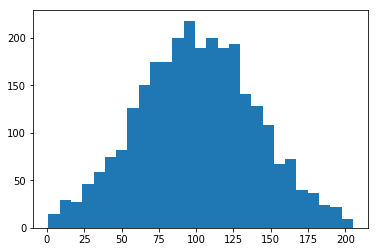

In [391]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.hist(traindata['account length'], bins='auto')

In [392]:
cnames1 =  ["account length","total day charge","total day calls","total eve charge","total eve calls","total night charge","total night calls","total intl charge","total intl calls","number customer service calls"]
cnames1

['account length',
 'total day charge',
 'total day calls',
 'total eve charge',
 'total eve calls',
 'total night charge',
 'total night calls',
 'total intl charge',
 'total intl calls',
 'number customer service calls']

# Normalisation

In [393]:
high = 1.0
low = 0.0
for i in cnames1:
    mins = np.min(traindata[i], axis=0)
    maxs = np.max(traindata[i], axis=0)
    rng = maxs - mins
    traindata[i] = high - (((high - low) * (maxs - traindata[i])) / rng)
    len(traindata)
traindata.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
0,0.622549,no,yes,25,0.600000,0.798430,0.481132,0.486710,0.413462,0.665289,0.222222,0.474667,0.333333,False.
1,0.519608,no,yes,26,0.723810,0.434944,0.518868,0.479739,0.528846,0.701653,0.222222,0.741333,0.333333,False.
2,0.666667,no,no,0,0.638095,0.722222,0.584906,0.204357,0.538462,0.360331,0.444444,0.632000,0.000000,False.
4,0.362745,yes,no,0,0.628571,0.452912,0.698113,0.305011,0.701923,0.450413,0.222222,0.482667,1.000000,False.
5,0.573529,yes,no,0,0.485714,0.652003,0.500000,0.572549,0.673077,0.514050,0.555556,0.208000,0.000000,False.


# Stratified sampling

In [394]:
from sklearn.cross_validation import train_test_split

#Select categorical variable
y = testdata['international plan']

#select subset using stratified Sampling
Rest, testdata = train_test_split(testdata, test_size = 0.5, stratify = y)

# Pre-Processing for Test Data

# Outlier analysis


{'whiskers': [<matplotlib.lines.Line2D at 0x1e2b92874e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e2b9287da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e2b9287390>],
 'medians': [<matplotlib.lines.Line2D at 0x1e2b9290630>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e2b9290a58>],
 'means': []}

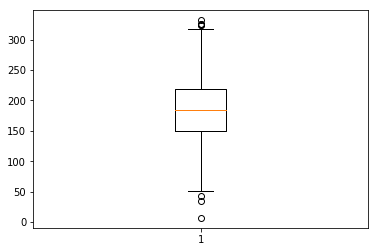

In [395]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.boxplot(testdata["total day minutes"])

# Detect and delete outliers from test data

In [396]:
for i in cnames:
    print(i)
    q75, q25 = np.percentile(testdata.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
   
    testdata = testdata.drop(testdata[testdata.loc[:,i] < min].index)
    testdata = testdata.drop(testdata[testdata.loc[:,i] > max].index)

account length
-11.0
205.0
number vmail messages
0.0
0.0
total day minutes
49.050000000000026
319.24999999999994
total day calls
44.5
152.5
total day charge
8.719999999999999
53.84
total eve minutes
63.25000000000003
332.04999999999995
total eve calls
53.0
149.0
total eve charge
5.6325
27.8525
total night minutes
54.95000000000002
343.75
total night calls
46.875
153.875
total night charge
2.45
15.489999999999998
total intl minutes
3.3999999999999995
17.0
total intl calls
-1.5
10.5
total intl charge
0.9849999999999997
4.545
number customer service calls
-0.5
3.5


# Checking data after boxplot


(542, 18)

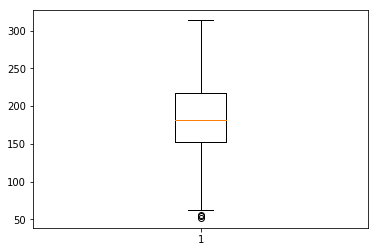

In [397]:
plt.boxplot(testdata["total day minutes"])
testdata.shape

# Correlation Analysis

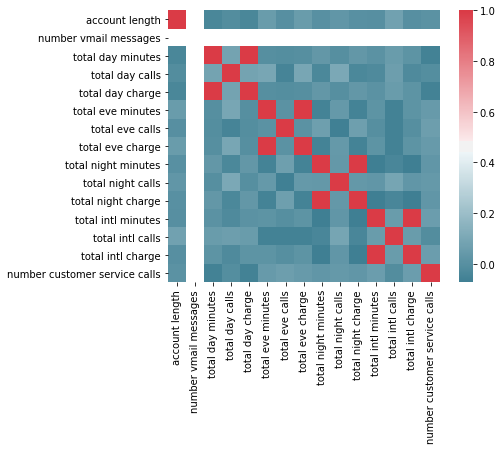

In [398]:
#Correlation plot
corr_test = testdata.loc[:,cnames]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr_test = corr_test.corr()

#Plot using seaborn library
sns.heatmap(corr_test, mask=np.zeros_like(corr_test, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Chisquare test of independence


In [399]:
#Save categorical variables
categories_test = ["international plan","voice mail plan"]
categories_test

['international plan', 'voice mail plan']

In [400]:
#loop for chi square values
for i in categories:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(testdata['Churn'],testdata[i]))
    print(p)

international plan
0.00010534417970027258
voice mail plan
1.0


# Removing highly coorelated variable

In [401]:
testdata = testdata.drop(['total day minutes','total eve minutes','total intl minutes','total night minutes'],axis=1)
testdata.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
1134,93,no,no,0,135,29.29,95,27.09,104,5.92,4,3.11,3,False.
63,163,no,no,0,118,47.21,91,9.80,90,7.66,8,2.81,0,False.
412,60,no,no,0,100,32.44,85,16.66,110,6.83,9,2.67,0,False.
1529,26,no,no,0,143,49.32,97,20.88,80,6.61,4,2.00,2,True.
129,133,no,no,0,72,40.94,62,17.23,76,9.58,5,2.08,1,False.


# Normality check


(array([ 6., 10., 14., 15., 25., 46., 46., 72., 76., 51., 56., 44., 26.,
        19., 16., 13.,  7.]),
 array([ 8.84      , 11.45588235, 14.07176471, 16.68764706, 19.30352941,
        21.91941176, 24.53529412, 27.15117647, 29.76705882, 32.38294118,
        34.99882353, 37.61470588, 40.23058824, 42.84647059, 45.46235294,
        48.07823529, 50.69411765, 53.31      ]),
 <a list of 17 Patch objects>)

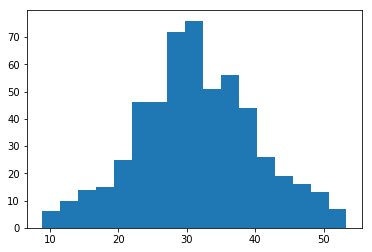

In [402]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.hist(testdata['total day charge'], bins='auto')

# Normalisation


In [403]:
high = 1.0
low = 0.0
for i in cnames1:
    mins = np.min(testdata[i], axis=0)
    maxs = np.max(testdata[i], axis=0)
    rng = maxs - mins
    testdata[i] = high - (((high - low) * (maxs - testdata[i])) / rng)

# Stratified sampling

In [404]:
from sklearn.cross_validation import train_test_split

#Select categorical variable
y1 = testdata['international plan']

#select subset using stratified Sampling
Rest1, testdata = train_test_split(testdata, test_size = 0.5, stratify = y1)

# Assigning levels to cat variables Train data


In [405]:
lis = []
for i in range(0, traindata.shape[1]):
    #print(i)
    if(traindata.iloc[:,i].dtypes == 'object'):
        traindata.iloc[:,i] = pd.Categorical(traindata.iloc[:,i])
        #print(marketing_train[[i]])
        traindata.iloc[:,i] = traindata.iloc[:,i].cat.codes 
        traindata.iloc[:,i] = traindata.iloc[:,i].astype('object')
        
        lis.append(traindata.columns[i])

# Changining name of dependent variable


In [406]:
traindata=traindata.rename(columns={'Churn':'Move'})
traindata.shape

(2797, 14)

# Assigning levels to cat variables Test data


In [407]:
lis = []
for i in range(0, testdata.shape[1]):
    #print(i)
    if(testdata.iloc[:,i].dtypes == 'object'):
        testdata.iloc[:,i] = pd.Categorical(testdata.iloc[:,i])
        #print(marketing_train[[i]])
        testdata.iloc[:,i] = testdata.iloc[:,i].cat.codes 
        testdata.iloc[:,i] = testdata.iloc[:,i].astype('object')
        
        lis.append(testdata.columns[i])

# Changining name of dependent variable


In [408]:
testdata=testdata.rename(columns={'Churn':'Move'})
testdata.shape

(271, 14)

# Model development.
We are here expected to develop a Model, on our data which will predict whether a customer will Move or no. So here we have to develop model on our train data then implement this model over test data and predict the target variable of test data.
The model selection depends upon the dependent variable.
The dependent variable can fall in either of the four categories:
1. Nominal
2. Ordinal
3. Interval
4. Ratio
If the dependent variable, in our case Move, is Nominal the only predictive analysis that we can perform is Classification, and if the dependent variable is Interval or Ratio the normal method is to do a Regression analysis, or classification after binning. But the dependent variable we are dealing with is Nominal, for which classification model is to be used.

So the classification model we developed here are:
1. C5.0
2. Random Forest.
3. Logistic regression.
4. KNN.
5. Naive Bayes.

For most of model we developed we had followed following steps:
1. Developing model over train data
2. Implementing model on our test data to predict test cases.
3. Building confusion matrix.
4. Calculate the accuracy and FNR.

# C5.0

# Libraries for C5.0

In [409]:
from sklearn import tree
from sklearn.metrics import accuracy_score
testdata.shape

(271, 14)

# Setting up test and train data for model


In [410]:
X_train_ind = traindata.values[:,0:13]
y_train_dep = traindata.values[:,13]
X_test_ind = testdata.values[:,0:13]
y_test_dep = testdata.values[:,13]
y_train_dep=y_train_dep.astype('int')
y_test_dep=y_test_dep.astype('int')

# Build model on train data


In [411]:
C50model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train_ind,y_train_dep)

# Predict test dependent variable


In [412]:
C50_predict=C50model.predict(X_test_ind)

# Generating Confusion Matrix


In [413]:
C50matrix = pd.crosstab(y_test_dep, C50_predict)
C50matrix

col_0,0,1
row_0,,
0,228,9
1,10,24


# Defining TN FN TP FP


In [414]:
TP = C50matrix.iloc[0,0]
FN = C50matrix.iloc[1,0]
TN = C50matrix.iloc[1,1]
FP = C50matrix.iloc[0,1]

# FNR -False Negative Rate


In [415]:
(FN*100)/(FN+TP)

4.201680672268908

# Accuracy


In [416]:
((TP+TN)*100)/(TP+TN+FP+FN)

92.98892988929889

# Random Forest

# Libraries for Random Forest

In [417]:
from sklearn.ensemble import RandomForestClassifier

# Developing model on test data

In [418]:
RF_model = RandomForestClassifier(n_estimators = 40).fit(X_train_ind, y_train_dep)

# Predicting test dependent variable


In [419]:
RF_Predictions = RF_model.predict(X_test_ind)

# Confusion Matrix

In [420]:
RFmatrix = pd.crosstab(y_test_dep, RF_Predictions)
RFmatrix

col_0,0,1
row_0,,
0,235,2
1,14,20


# Defining TN FN TP FP


In [421]:
TP1 = RFmatrix.iloc[0,0]
FN1 = RFmatrix.iloc[1,0]
TN1 = RFmatrix.iloc[1,1]
FP1 = RFmatrix.iloc[0,1]

# Accuracy 


In [422]:
((TP1+TN1)*100)/(TP1+TN1+FP1+FN1)

94.09594095940959

# FNR

In [423]:
(FN1*100)/(FN1+TP1)

5.622489959839357

# Logistic Regression

# Importing Libraries for Logistic Regression

In [424]:
import statsmodels.api as sm

# Setting up data for Logistic regression


In [425]:
train_logit1 = pd.DataFrame(traindata['Move'])
test_logit1 = pd.DataFrame(testdata['Move'])

In [426]:
cnamesz =  ["account length","number vmail messages","total day calls","total day charge","total eve calls","total eve charge","total night calls","total night charge","total intl calls","total intl charge","number customer service calls"]
train_logit1 = train_logit1.join(traindata[cnamesz])
test_logit1 = test_logit1.join(testdata[cnamesz])

# Implementing dummies


In [427]:
for i in categories:
    temp = pd.get_dummies(traindata[i], prefix = i)
    train_logit1 = train_logit1.join(temp)
    temp1=pd.get_dummies(testdata[i],prefix = i)
    test_logit1 = test_logit1.join(temp1)

In [428]:
train_cols = train_logit1.columns[1:15]
train_logit1=train_logit1.astype(float)
test_logit1=test_logit1.astype(float)

# Build Logistic Regression Model

In [429]:
logit = sm.Logit(train_logit1['Move'], train_logit1[train_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.238154
         Iterations 8


# Predict test data


In [430]:
test_logit1['probab'] = logit.predict(test_logit1[train_cols])
test_logit1['ActualVal'] = 1
test_logit1.loc[test_logit1.probab < 0.5, 'ActualVal'] = 0

# Build Confusion Matrix

In [431]:
logitmatrix = pd.crosstab(test_logit1['Move'], test_logit1['ActualVal'])
logitmatrix

ActualVal,0,1
Move,,
0.0,232,5
1.0,18,16


# Defining TN FN TP FP


In [432]:
TP2 = logitmatrix.iloc[0,0]
FN2 = logitmatrix.iloc[1,0]
TN2 = logitmatrix.loc[1,1]
FP2 = logitmatrix.loc[0,1]

# Accuracy


In [433]:
((TP2+TN2)*100)/(TP2+TN2+FP2+FN2)

91.5129151291513

# FNR


In [434]:
(FN2*100)/(FN2+TP2)

7.2

# KNN

# Importing libraries for KNN

In [435]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train_ind, y_train_dep)

# Predict test cases

In [436]:
KNN_Predictions = KNN_model.predict(X_test_ind)

# Confusion Matrix

In [437]:
KNNmatrix = pd.crosstab(y_test_dep, KNN_Predictions)
KNNmatrix

col_0,0,1
row_0,,
0,232,5
1,26,8


# Defining TN FN TP FP


In [438]:
TP3 = KNNmatrix.iloc[0,0]
FN3 = KNNmatrix.iloc[1,0]
TN3 = KNNmatrix.iloc[1,1]
FP3 = KNNmatrix.iloc[0,1]

# Accuracy


In [439]:
((TP3+TN3)*100)/(TP3+TN3+FP3+FN3)

88.56088560885608

# FNR

In [440]:
(FN3*100)/(FN3+TP3)

10.077519379844961

# Naive Bayes

# Importing libraries for Naive Bayes

In [441]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes implementation


In [442]:
NBmodel = GaussianNB().fit(X_train_ind, y_train_dep)

# Predict test cases


In [443]:
NBpredictions = NBmodel.predict(X_test_ind)

# Confusion Matrix


In [444]:
NBmatrix = pd.crosstab(y_test_dep, NBpredictions)
NBmatrix

col_0,0,1
row_0,,
0,225,12
1,21,13


# Defining TN FN TP FP


In [445]:
TP4 = NBmatrix.iloc[0,0]
FN4 = NBmatrix.iloc[1,0]
TN4 = NBmatrix.loc[1,1]
FP4 = NBmatrix.loc[0,1]

# Accuracy


In [446]:
((TP4+TN4)*100)/(TP4+TN4+FP4+FN4)

87.82287822878229

# FNR


In [448]:
(FN4*100)/(FN4+TP4)

8.536585365853659

# Conclusion - Model Selection
The best False Negative Ratio is achieved with C5.0 and Random Forest which is 4.20 and 5.62 respectively. However, the best accuracy is achieved with Random Forest with an accuracy of 94.09 and the second best is C5.0 with an accuracy of 92.98.
Random Forest and C.50 are the optimal models for our problem.